In [22]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from numpy import where
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [7]:
features,target = make_circles(n_samples=5000, noise=0.1, random_state=12345)

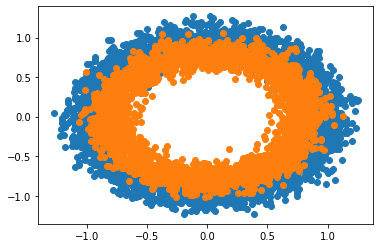

In [8]:
for i in range(2):
    samples_ix = where(target == i)
    plt.scatter(features[samples_ix, 0], features[samples_ix, 1])
plt.show()

In [9]:
n_test = 2500
features_train, features_test = features[:n_test, :], features[n_test:, :]
target_train, target_test = target[:n_test], target[n_test:]

In [12]:
model = Sequential()
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(features_train, target_train, validation_data=(features_test, target_test), epochs=300, verbose=0)

In [15]:
_, train_acc = model.evaluate(features_train, target_train, verbose=0)
_, test_acc = model.evaluate(features_test, target_test, verbose=0)

In [16]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.859, Test: 0.832


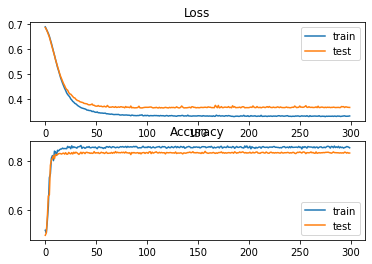

In [17]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

In [18]:
model.fit(features_train, target_train, epochs=300, verbose=0)

In [19]:
pred_probs = model.predict(features_test, verbose=0)

In [20]:
pred_classes = model.predict_classes(features_test, verbose=0)

D:\Packages\envs\tensorflow\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
pred_probs = pred_probs[:, 0]
pred_classes = pred_classes[:, 0]

In [23]:
accuracy = accuracy_score(target_test, pred_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.833200


In [24]:
precision = precision_score(target_test, pred_classes)
print('Precision: %f' % precision)

Precision: 0.846914


In [25]:
recall = recall_score(target_test, pred_classes)
print('Recall: %f' % recall)

Recall: 0.816667


In [26]:
f1 = f1_score(target_test, pred_classes)
print('F1 score: %f' % f1)

F1 score: 0.831515


In [27]:
kappa = cohen_kappa_score(target_test, pred_classes)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.666475


In [28]:
auc = roc_auc_score(target_test, pred_probs)
print('ROC AUC: %f' % auc)

ROC AUC: 0.917229


In [29]:
matrix = confusion_matrix(target_test, pred_classes)
print(matrix)

[[1054  186]
 [ 231 1029]]
